# Определение перспективного тарифа для телеком-компании

Телеком-компания предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Для корректировки рекламного бюджета коммерческий департамент компании хочет понять, какой тариф приносит больше денег.

***Задачи проекта***: 
 - Анализ поведения клиентов компании и определение лучшего тарифа;
 - Проверка гипотез:
  - *Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается*;
  - *Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов*.

***Входные данные:*** 

Выборка из 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков, сообщений и интернет-трафика использовали за 2018 год.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчет-выручки" data-toc-modified-id="Расчет-выручки-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчет выручки</a></span></li><li><span><a href="#Анализ-поведения-клиентов-оператора" data-toc-modified-id="Анализ-поведения-клиентов-оператора-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ поведения клиентов оператора</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Изучение данных из файлов

In [73]:
# Импорт необходимых для работы библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Чтение файлов с данными и сохранение в соответствующих переменных
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

Изучим данные таблицы ***users***:

In [74]:
# Создание функции для отображения информации о данных

def display_info(data):
    # Вывод на экран первых строк таблицы
    display(data.head())
    # Вывод на экран общей инофрмации и данных
    data.info()
    
# Применение функции
display_info(users)

# Создадим функцию проверки грубых дубликатов
def find_duplicated(data):
    data.duplicated().sum()
    if data.duplicated().sum() == 0:
        print('Дубликатов не обнаружено')
    else:
        print('Количество дубликатов:{}'.format(data.duplicated().sum()))
# Применение функции
find_duplicated(users)

# Проверка наличия скрытых дубликатов в названиях городов
users['city'].unique()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Дубликатов не обнаружено


array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Всего в таблице 8 столбцов со следующими типами данных: int64, object.

Наименование столбцов и информация, содержащаяся в них:

 - *user_id* — уникальный идентификатор пользователя
 - *age* — возраст пользователя
 - *churn_date* — дата прекращения пользования тарифом
 - *city* — город проживания пользователя
 - *first_name* — имя пользователя
 - *last_name* — фамилия пользователя
 - *reg_date* — дата подключения тарифа
 - *tariff* — название тарифного плана

Всего в датасете 500 строк. При этом, в столбце *churn_date* только 38 строк заполнены данными. Из условия задачи известно, что пропущенные значения в данном столбце означают, что тариф еще используется. Замена пропущенных значений не требуется.

Грубых и скрытых дубликатов в таблице не обнаружено.

Cтолбцы *churn_date* и *reg_date* содержат дату, в связи с чем типы данных их необходимо изменить с *object* на *datetime*.

Типы данных других столбцов соответствуют сохраненным в них значениям.

Изучим данные таблицы ***calls***:

In [75]:
display_info(calls)
find_duplicated(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Дубликатов не обнаружено


Всего в таблице 4 столбца со следующими типами данных: float64, int64, object.

Наименование столбцов и информация, содержащаяся в них:

 - *id* — уникальный номер звонка
 - *call_date* — дата звонка
 - *duration* — длительность звонка в минутах
 - *user_id* — идентификатор пользователя, сделавшего звонок

Всего в датасете 202 607 строк. Пропущенных значений в столбцах нет. Дубликатов не обнаружено.

Cтолбец *call_date* содержит дату, в связи с чем тип данных столбца необходимо изменить с *object* на *datetime*.

Столбец *duration* содержит нулевые значения, обозначающие не состоявшийся разговор. Данные значения не имеют ценности для дальнейших расчетов в рамках поставленных задач. Кроме того, при расчете нулевые значения могут занижать среднее время, затрачиваемое на разговоры.

В связи с тем, что «Мегалайн» всегда округляет секунды каждого звонка до минут в большую сторону, значения в столбце *duration* следует округлить до целых в большую сторону.

Типы данных других столбцов соответствуют сохраненным в них значениям.

Изучим данные таблицы ***messages***:

In [76]:
display_info(messages)
find_duplicated(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Дубликатов не обнаружено


Всего в таблице 3 столбца со следующими типами данных: int64, object.

Наименование столбцов и информация, содержащаяся в них:

 - *id* — уникальный номер сообщения
 - *message_date* — дата сообщения
 - *user_id* — идентификатор пользователя, отправившего сообщение

Всего в датасете 123 036 строк. Пропущенных значений в столбцах нет. Дубликатов не обнаружено.

Cтолбец message_date содержит дату, в связи с чем тип данных столбца необходимо изменить с *object* на *datetime*.

Типы данных других столбцов соответствуют сохраненным в них значениям.

Изучим данные таблицы ***internet***:

In [77]:
display_info(internet)
find_duplicated(internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Дубликатов не обнаружено


Всего в таблице 5 столбцов со следующими типами данных: float64, int64, object.

Наименование столбцов и информация, содержащаяся в них:

 - *Unnamed: 0* - порядковых номер строк
 - *id* — уникальный номер сессии
 - *mb_used* — объём потраченного за сессию интернет-трафика (в мегабайтах)
 - *session_date* — дата интернет-сессии
 - *user_id* — идентификатор пользователя

Всего в датасете 149 396 строк. Пропущенных значений в столбцах нет. Дубликатов не обнаружено.

Столбец *Unnamed: 0* - дублирует номера индексов и не представляет ценности. Необходимо его удалить.

Cтолбец session_date содержит дату, в связи с чем тип данных столбца необходимо изменить с *object* на *datetime*.

Значения столбца *mb_used* необходимо оставить без обработки до востребования, т.к. для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в большую сторону.

Типы данных других столбцов соответствуют сохраненным в них значениям.

Изучим данные таблицы ***tariffs***:

In [78]:
display_info(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Всего в таблице 8 столбцов со следующими типами данных: int64, object.

Наименование столбцов и информация, содержащаяся в них:

 - *tariff_name* — название тарифа
 - *rub_monthly_fee* — ежемесячная абонентская плата в рублях
 - *minutes_included* — количество минут разговора в месяц, включённых в абонентскую плату
 - *messages_included* — количество сообщений в месяц, включённых в абонентскую плату
 - *mb_per_month_included* — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
 - *rub_per_minute* — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
 - *rub_per_message* — стоимость отправки сообщения сверх тарифного пакета
 - *rub_per_gb* — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

Всего в датасете 2 строки. Пропущенных значений в столбцах нет.

Типы столбцов соответствуют сохраненным в них значениям.

###### Вывод

Нами были изучены данные из файлов ***users, calls, messages, internet, tariffs***.

Значения столбца *churn_date* таблицы ***users*** содержат пропуски. Обработка пропусков не требуется, так как пропущенные значения обозначают продолжение использования тарифа.

Дубликатов в рассмотренных таблицах не обнаружено.

Значения столбца *duration* таблицы ***calls*** содержат нулевые значения, обозначающие несостоявшиеся разговоры. За неимением ценности, а также во избежание искажения расчетов среднего времени, затрачиваемого на разговоры, необходимо рассмотреть исключение строк с нулевыми значениями в данном столбце из расчета.

Типы данных столбцов, содержащих даты, в таблицах ***users, calls, messages, internet*** - *object*. Необходимо изменить на *datetime*.

Столбец *Unnamed: 0* таблицы ***internet*** дублирует номера индексов и не представляет ценности. Необходимо его удалить.






## Предобработка данных

Обработаем данные согласно рекомендациям, отраженным в выводе этапа 1:

In [79]:
# Создание функции замены изменения типов данных столбцов на 'datetime'
def to_datetime(data, column):
    # изменение типа данных
    data[column] = pd.to_datetime(
        data[column],
        format = '%Y-%m-%d')
    # проверка замены, вывод на экран типа данных
    print(data[column].name)
    print(data[column].dtype)
    print()
        
# Применение функции
to_datetime(users, 'churn_date')
to_datetime(users, 'reg_date')
to_datetime(calls, 'call_date')
to_datetime(messages, 'message_date')
to_datetime(internet, 'session_date')

# Исключение строк с нулевыми значениями столбца 'duration' таблицы 'calls'
calls = calls[calls['duration'] != 0]

# Удаление столбца 'Unnamed: 0' таблицы 'internet'
del internet['Unnamed: 0']

# Проверка удаления столбца 'Unnamed: 0' таблицы 'internet'
internet.info()



churn_date
datetime64[ns]

reg_date
datetime64[ns]

call_date
datetime64[ns]

message_date
datetime64[ns]

session_date
datetime64[ns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


###### Вывод

Типы данных столбцов *churn_date, reg_date, call_date, message_date, session_date* таблиц ***users, calls, messages, internet*** успешно заменены на *datetime*.

Столбец *Unnamed: 0* таблицы ***internet*** был успешно удален.

Из таблицы ***calls*** исключены строки с нулевыми значениями столбца *duration*.

## Расчет выручки

Для расчета помесячной выручки с каждого пользователя нам необходимо посчитать:

 - Количество сделанных звонков и израсходованных минут разговора;
 - Количество отправленных сообщений;
 - Объем израсходованного интернет-трафика.

Рассчитаем количество звонков и израсходованных минут:

Так как «Мегалайн» всегда округляет секунды каждого звонка до минут в большую сторону, перед рассчетом количества израсходованных минут каждым пользователем за каждый месяц необходимо значения в столбце *duration* таблицы ***calls*** округлить до целых в большую сторону.

In [80]:
# Округление значений столбца 'duration' в большую сторону
calls['duration'] = np.ceil(calls['duration'])

# Создание столбца в 'user_calls' с номерами месяцев, в которых сделаны звонки
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

# Расчет ежемесячного количества и длительности звонков для каждого пользователя
monthly_calls = calls.groupby(['user_id', 'month']).agg(
    {'duration': ['count', 'sum']}
)
monthly_calls.columns = ['calls_count', 'calls_duration']

# Вывод полученной таблицы на экран
monthly_calls

calls_count  calls_duration
user_id month                             
1000    5               17           159.0
        6               28           172.0
        7               41           340.0
        8               42           408.0
        9               46           466.0
...                    ...             ...
1498    10              30           247.0
1499    9                8            70.0
        10              44           449.0
        11              62           612.0
        12              56           492.0

[3168 rows x 2 columns]

Рассчитаем количество сообщений, отправленных каждым пользователем за каждый месяц:

In [81]:
# Создание столбца в 'messages' с номерами месяцев, в которых сделаны звонки
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

# Расчет ежемесячного количества и длительности звонков для каждого пользователя
monthly_messages = messages.groupby(['user_id', 'month']).agg(
    {'message_date': ['count']}
)
monthly_messages.columns = ['messages_count']

# Вывод полученной таблицы на экран
monthly_messages


messages_count
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
...                       ...
1498    10                 42
1499    9                  11
        10                 48
        11                 59
        12                 66

[2717 rows x 1 columns]

Рассчитаем объем израсходованного интернет-трафика каждым пользователем по месяцам, учитвая, что "Мегалайн" округляет помесячный объем траффика для каждого пользователя до гб в большую сторону.

In [82]:
# Создание столбца в 'internet' с номерами месяцев, в которых были интернет-сессии
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

# Расчет ежемесячного количества и длительности звонков для каждого пользователя
monthly_sessions = internet.groupby(['user_id', 'month']).agg(
    {'mb_used': ['sum']}
)
monthly_sessions.columns = ['mb_used']

# Округление объемов помесячного траффика до гб
monthly_sessions['gb_used'] = np.ceil(
    np.ceil(monthly_sessions['mb_used'])/1024
)
del monthly_sessions['mb_used']

# Вывод полученной таблицы на экран
monthly_sessions

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

Необходимые данные для расчета выручки подготовлены. Объединим полученные таблицы в одну:

In [83]:
# Объединение датафреймов 'monthly_calls', 'monthly_messages', 'monthly_sessions'
monthly_data = monthly_sessions.join([monthly_calls, monthly_messages])
monthly_data = monthly_sessions.join([monthly_calls, monthly_messages], how = 'outer')

# Вывод объединенной таблицы на экран
monthly_data

gb_used  calls_count  calls_duration  messages_count
user_id month                                                      
1000    5          3.0         17.0           159.0            22.0
        6         23.0         28.0           172.0            60.0
        7         14.0         41.0           340.0            75.0
        8         14.0         42.0           408.0            81.0
        9         15.0         46.0           466.0            57.0
...                ...          ...             ...             ...
1498    10        21.0         30.0           247.0            42.0
1499    9          2.0          8.0            70.0            11.0
        10        18.0         44.0           449.0            48.0
        11        18.0         62.0           612.0            59.0
        12        13.0         56.0           492.0            66.0

[3214 rows x 4 columns]

Таблицы успешно объединены. Далее необходимо объединить данную таблицу с таблицей ***users*** и ***tariffs***

In [84]:
# Вывод столбцa 'month' из индекса таблицы 'monthly_data'
monthly_data = monthly_data.reset_index(level = 'month')

# Объединение таблицы 'users' c 'monthly_data'
monthly_data = users.join(monthly_data, on = 'user_id', how = 'right')

# Переименование столбца 'tariff' таблицы 'monthly_data'
monthly_data.rename(columns = {'tariff':'tariff_name'}, inplace = True)

# Объединение таблицы 'monthly_data' и 'tariffs'
monthly_data = monthly_data.merge(tariffs, on = 'tariff_name', how = 'left')

# Вывод объединенной таблицы на экран
monthly_data

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,gb_used,calls_count,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,3.0,17.0,159.0,22.0,1000,30720,3000,1950,150,1,1
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23.0,28.0,172.0,60.0,1000,30720,3000,1950,150,1,1
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14.0,41.0,340.0,75.0,1000,30720,3000,1950,150,1,1
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14.0,42.0,408.0,81.0,1000,30720,3000,1950,150,1,1
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,15.0,46.0,466.0,57.0,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,21.0,30.0,247.0,42.0,50,15360,500,550,200,3,3
3210,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,2.0,8.0,70.0,11.0,50,15360,500,550,200,3,3
3211,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,18.0,44.0,449.0,48.0,50,15360,500,550,200,3,3
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,18.0,62.0,612.0,59.0,50,15360,500,550,200,3,3


Данные успешно объединены. Рассчитаем выручку от каждого пользователя:

In [85]:
# Создание функции рассчета столбца с данными о ежемесячной выручке с каждого пользователя
def monthly_income(row):
    
    # Условие расчета выручки от звонков сверх лимита
    if row['calls_duration'] > row['minutes_included']:
        calls_income = (row['calls_duration'] - row['minutes_included']) * row['rub_per_minute']
    else:
        calls_income = 0
        
    # Условие расчета выручки от сообщений сверх лимита   
    if row['messages_count'] > row['minutes_included']:
        messages_income = (row['messages_count'] - row['minutes_included']) * row['rub_per_message']
    else:
        messages_income = 0
        
    # Условие расчета выручки от трафика сверх лимита      
    if row['gb_used'] > row['mb_per_month_included']/1024:
        internet_income = (row['gb_used'] - row['mb_per_month_included']/1024) * row['rub_per_gb']
    else:
        internet_income = 0 
        
    # Расчет выручки    
    total_income = calls_income + messages_income + internet_income + row['rub_monthly_fee']
    
    return total_income

# Применение функции
monthly_data['monthly_income'] = monthly_data.apply(monthly_income, axis = 1)

# Вывод результата на экран
display(monthly_data)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff_name,month,gb_used,...,calls_duration,messages_count,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,monthly_income
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,3.0,...,159.0,22.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,6,23.0,...,172.0,60.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,7,14.0,...,340.0,75.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,8,14.0,...,408.0,81.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,9,15.0,...,466.0,57.0,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,10,21.0,...,247.0,42.0,50,15360,500,550,200,3,3,1750.0
3210,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,9,2.0,...,70.0,11.0,50,15360,500,550,200,3,3,550.0
3211,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,10,18.0,...,449.0,48.0,50,15360,500,550,200,3,3,1150.0
3212,1499,35,NaT,Пермь,Гектор,Корнилов,2018-09-27,smart,11,18.0,...,612.0,59.0,50,15360,500,550,200,3,3,1486.0


Помесячная выручка с каждого пользователя успешно рассчитана.

###### Вывод

На данном этапе для каждого пользователя были рассчитаны следующие показатели за каждый месяц:

 - Количество сделанных звонков и израсходованных минут разговора (таблица ***monthly_calls***);
 - Количество отправленных сообщений (таблица ***monthly_messages***);
 - Объем израсходованного интернет-трафика (таблица ***monthly_sessions***).

Полученные таблицы были объединены с таблицами ***users*** и ***tariffs*** в датасет ***monthly_data*** для удобного расчета помесячной выручки с каждого пользователя.

Результаы расчета сохранены в столбце *total_income* датасета ***monthly_data***.

## Анализ поведения клиентов оператора

Исследуем поведение клиентов оператора:

In [86]:
# Создание функции для описания сравниваемых услуг тарифов 'Smart' и 'Ultra'
def compare_tariffs(service,title,xlabel):
    print (service)

    # Построение среза таблицы 'monthly_data' по тарифу 'smart'
    monthly_data_smart = monthly_data[monthly_data['tariff_name'] == 'smart']
    # Построение среза таблицы 'monthly_data' по тарифу 'ultra'
    monthly_data_ultra = monthly_data[monthly_data['tariff_name'] == 'ultra']

    # Построение гистограммы для 'smart'
    plt.style.use('ggplot')
    monthly_data_smart[service].plot.hist(
        legend = True,
        bins = 25,
        figsize = (10,8),
        alpha = 0.5
    )
    
    # Построение гистограммы для 'ultra'
    plt.style.use('ggplot')
    monthly_data_ultra[service].plot.hist(
        legend = True,
        bins = 25, 
        alpha = 0.5
    )
    
    plt.legend(['Смарт', 'Ультра'])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Частота')
    plt.show()

    # Расчет и вывод на экран описательной статистики для'Smart'
    print('Описательная статистика для "Smart"')
    display(monthly_data_smart[service].describe())
    # Расчет и вывод на экран дисперсии для 'Smart'
    print('Дисперсия для "Smart": {}'.format(int(np.var(monthly_data_smart[service]))))
    print()
    # Расчет и вывод на экран описательной статистики для'Ultra'      
    print('Описательная статистика для "Ultra"')
    display(monthly_data_ultra[service].describe())
    # Расчет и вывод на экран дисперсии для'Ultra'   
    print('Дисперсия для "Ultra": {}'.format(int(np.var(monthly_data_ultra[service]))))

calls_duration


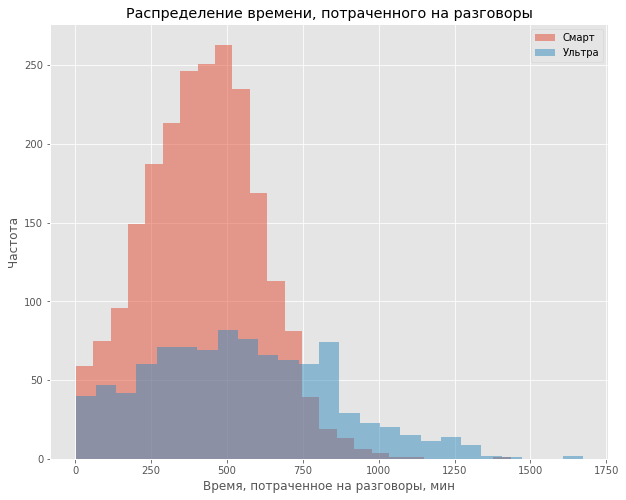

Описательная статистика для "Smart"


count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: calls_duration, dtype: float64

Дисперсия для "Smart": 35702

Описательная статистика для "Ultra"


count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: calls_duration, dtype: float64

Дисперсия для "Ultra": 93239


In [87]:
# Применение функции для сравнения данных о длительности звонков, сделанных пользователями тарифов 'Smart' и 'Ultra'
compare_tariffs('calls_duration',
                'Распределение времени, потраченного на разговоры', 
                'Время, потраченное на разговоры, мин')

Интерпретируем полученные гистограммы и данные описательной статистики:

1. Набор данных по тарифу ***Smart*** симметричен, тогда как по тарифу ***Ultra*** скошен вправо.
2. Разброс данных в выборке по тарифу ***Smart*** менее выражен, чем  выборке по тарифу ***Ultra***: стандартное отклонение и дисперсия рассчитанные для тарифа ***Smart*** меньше, чем для тарифа ***Ultra***: 189 и 35 702 против 305.5 и 93 239 соответственно.
3. Чаще всего пользователи обоих тарифов тратят на звонки время около среднего или медианного по выборке. Среднее значение времени, потраченного на звонки по тарифу ***Smart*** меньше, чем по тарифу ***Ultra***: 419.4 мин против 547.8 мин соответственно;
4. В целом, скос и разброс набора данных, а также более высокие средние и медианные значения, рассчитанные по тарифу ***Ultra*** говорят о том, что потребность в разговорах по телефону у пользователей тарифа ***Ultra*** выше, чем у пользователей тарифа ***Smart***.


messages_count


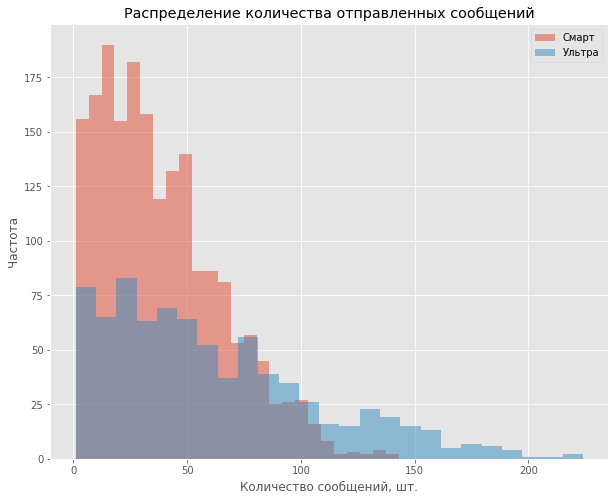

Описательная статистика для "Smart"


count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: messages_count, dtype: float64

Дисперсия для "Smart": 717

Описательная статистика для "Ultra"


count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: messages_count, dtype: float64

Дисперсия для "Ultra": 2107


In [89]:
# Применение функции для сравнения данных об отправленных сообщениях пользователями тарифов 'Smart' и 'Ultra'
compare_tariffs('messages_count',
                'Распределение количества отправленных сообщений', 
                'Количество сообщений, шт.')

Интерпретируем полученные гистограммы и данные описательной статистики:

1. Наборы данных по тарифам ***Smart*** и ***Ultra*** скошены вправо
2. Разброс данных в выборке по тарифу ***Smart*** менее выражен, чем  выборке по тарифу ***Ultra***: стандартное отклонение и дисперсия рассчитанные для тарифа ***Smart*** меньше, чем для тарифа ***Ultra***: 26.8 и 717 против 45.9 и 2107 соответственно.
3. Чаще всего пользователи обоих тарифов отправляют сообшений в количестве около среднего или медианного значения по выборке. Среднее количество отправленных сообщений по тарифу ***Smart*** меньше, чем по тарифу ***Ultra***: 38 против 61 соответственно;
4. В целом, разброс набора данных, а также более высокие средние и медианные значения, рассчитанные по тарифу ***Ultra*** говорят о том, что потребность в отправке сообщений у пользователей тарифа ***Ultra*** выше, чем у пользователей тарифа ***Smart***.

gb_used


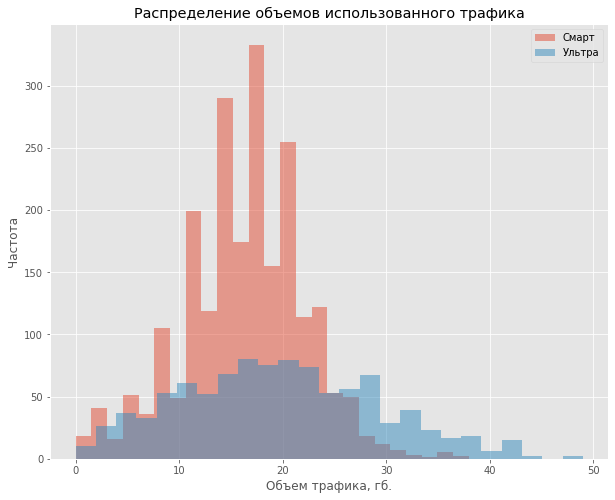

Описательная статистика для "Smart"


count    2228.000000
mean       16.336176
std         5.737923
min         0.000000
25%        13.000000
50%        17.000000
75%        20.000000
max        38.000000
Name: gb_used, dtype: float64

Дисперсия для "Smart": 32

Описательная статистика для "Ultra"


count    975.000000
mean      19.694359
std        9.702924
min        0.000000
25%       12.000000
50%       19.000000
75%       27.000000
max       49.000000
Name: gb_used, dtype: float64

Дисперсия для "Ultra": 94


In [90]:
# Применение функции для сравнения данных о расходованном интернет-трафике пользователями тарифов 'Smart' и 'Ultra'
compare_tariffs('gb_used',
                'Распределение объемов использованного трафика', 
                'Объем трафика, гб.')

1. Наборы данных по тарифам ***Smart*** и ***Ultra*** симметричны.
2. Разброс данных в выборке по тарифу ***Smart*** менее выражен, чем  выборке по тарифу ***Ultra***: стандартное отклонение и дисперсия рассчитанные для тарифа ***Smart*** меньше, чем для тарифа ***Ultra***: 5.7 и 32 против 9.7 и 94 соответственно.
3. Чаще всего пользователи обоих тарифов расходуют трафика в количестве около среднего или медианного значения по выборке. Средний объем трафика по тарифу ***Smart*** меньше, чем по тарифу ***Ultra***: 16.3 gb против 19.7 gb соответственно;
4. В целом, разброс набора данных, а также более высокие средние и медианные значения, рассчитанные по тарифу ***Ultra*** говорят о том, что потребность в интернет-трафике у пользователей тарифа ***Ultra*** выше, чем у пользователей тарифа ***Smart***.

###### Вывод

Тарифом ***Smart*** пользуется большее количество людей, но потребности в длительности разговоров, количестве сообщений и объеме интернет-трафика у пользователей тарифа ***Ultra*** выше, чем у пользователей тарифа ***Smart***: 

 - Пользователи тарифа ***Smart*** тратят на звонки от 2 до 1435 минут в месяц, а пользователи тарифа ***Ultra*** - от 1 до 1673 минут. В среднем, пользователь тарифа ***Smart*** тратит 419 минут в месяц на звонки, а пользователь тарифа ***Ultra*** - 548 минут.
 

 - Пользователи тарифа ***Smart*** отправляют от 1 до 143 сообщений в месяц, а пользователи тарифа ***Ultra*** - от 1 до 224. В среднем, пользователь тарифа ***Smart*** отправляет 38 сообщений в месяц, а пользователь тарифа ***Ultra*** - 61.
 
 
 - Пользователи тарифа ***Smart*** используют от 0 до 38 gb интернет-трафика в месяц, а пользователи тарифа ***Ultra*** - от 0 до 49. В среднем, пользователь тарифа ***Smart*** использует 16 gb в месяц, а пользователь тарифа ***Ultra*** - 20.
 
В среднем, пользователи тарифа ***Ultra*** не превышают лимиты по услугам, а пользователи тарифа ***Smart*** превышают лимит по доступному интернет-трафику и чаще платят за трафик сверх лимита.

## Проверка гипотез

Одной из поставленных задач в данном проекте является проверка гипотезы о различии средней выручки с пользователей тарифов ***Smart*** и ***Ultra***. Сравним среднюю выручку с пользователей данных тарифов и оценим статистическую значимость полученной разницы:

In [91]:
# Расчет суммы выручки с пользователей тарифов с помощью сводной таблицы:
total_income_compare = monthly_data.pivot_table(index = 'tariff_name', values = 'monthly_income', aggfunc = 'sum')
total_income_compare.columns = ['total_income']

# Расчет средней выручки с пользователей тарифов с помощью сводной таблицы:
monthly_income_compare = monthly_data.pivot_table(index = 'tariff_name', values = 'monthly_income', aggfunc = 'mean')

# Вывод результата на экран
display(total_income_compare)
display(monthly_income_compare)

,total_income
tariff_name,
smart,2836567.0
ultra,2039100.0


,monthly_income
tariff_name,
smart,1272.573800
ultra,2070.152284


Из результатов расчетов видно, что в рамках рассмотренной выборки суммарная выручка с пользователей тарифа ***Smart*** больше, чем с пользователей тарифа ***Ultra*** , более, чем на 790 тыс. рублей.

В то же время, средняя выручка с пользователей тарифа ***Ultra*** выше, чем с пользователей тарифа ***Smart*** почти на 800 р. Проверим, значимо ли статистически данное различие.

Проверка гипотезы о разной выручке для каждого из тарифов будет сводиться к проверке гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. 

Таким оборазом, из полученных нам ранее данных нужно сформировать отдельные выборки по выручке с пользователей каждого из тарифов:

In [92]:
# Формирование выборки, содержащей данные о помесячной выручке с пользователей тарифа 'Smart'
income_data_smart = monthly_data[
    monthly_data['tariff_name'] == 'smart']['monthly_income']
print(income_data_smart.describe())
print()

# Формирование выборки, содержащей данные о помесячной выручке с пользователей тарифа 'Ultra'
income_data_ultra = monthly_data[
    monthly_data['tariff_name'] == 'ultra']['monthly_income']
print(income_data_ultra.describe())

count    2229.000000
mean     1272.573800
std       813.582805
min       550.000000
25%       550.000000
50%       994.000000
75%      1750.000000
max      6671.000000
Name: monthly_income, dtype: float64

count     985.000000
mean     2070.152284
std       376.187114
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: monthly_income, dtype: float64


Каждая из полученных выборок характеризует свою генеральную совокупность.

Сформулируем нулевую гипотезу, относительно которой мы будем проверять статистическую значимость результатов сравнения выручки по тарифам:

"*Средние значения двух генеральных совокупностей, характеризуемых выборками ***income_data_smart*** и ***income_data_smart***,  равны"*.

Тогда альтернативной гипотезой будет:

"*Средние значения двух генеральных совокупностей, характеризуемых выборками ***income_data_smart*** и ***income_data_smart***,  не равны"*.

Для проверки гипотезы применим *t-test*. Критерий значимости, *alpha*, примем равным 0.05.


In [93]:
# Создадим функцию для тестирования

def t_test(sample_1, sample_2, var_equality):

    # Установка критерия значимости
    alpha = 0.05

    # Применение теста
    results = st.ttest_ind(
    sample_1,
    sample_2,
    # equal_var - установливается False, т.к. дисперсии выборок значительно отличаются
    equal_var = var_equality)

    # Вывод на экран результата теста
    print('p-значение: ', results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не отвергаем нулевую гипотезу')
        
# Применение функции
t_test(income_data_smart, income_data_ultra, False)

p-значение:  3.798003235009034e-261
Отвергаем нулевую гипотезу


Из результатов теста можно сделать вывод о том, что вероятность получить наблюдаемый результат при верной нулевой гипотезе ничтожно мал, и мы не можем принять нулевую гипотезу, что позволяет нам считать, что средняя помесячная выручка с пользователей тарифа ***Ultra*** действительно выше, чем с пользователей тарифа ***Smart***

Очередной гипотезой, которую необходимо проверить, является гипотеза об отличии выручки с пользователей Москвы и других регионов. Проверка данной гипотезы также сводится к проверке гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

Сформируем выборки отдельно по Москве и другим регионам:

In [94]:
# Формирование выборки, содержащей данные о помесячной выручке с пользователей из Москвы
income_data_moscow = monthly_data[
    monthly_data['city'] == 'Москва']['monthly_income']
print(income_data_moscow.describe())
print()
# Формирование выборки, содержащей данные о помесячной выручке с пользователей из других регионов
income_data_others = monthly_data[
    monthly_data['city'] != 'Москва']['monthly_income']
print(income_data_others.describe())
print()

count     611.000000
mean     1539.176759
std       752.989181
min       550.000000
25%       750.000000
50%      1750.000000
75%      1950.000000
max      5267.000000
Name: monthly_income, dtype: float64

count    2603.000000
mean     1511.805609
std       808.849204
min       550.000000
25%       750.000000
50%      1550.000000
75%      1950.000000
max      6671.000000
Name: monthly_income, dtype: float64



Из описательной статистики полученных выборок видно, что средняя выручка с пользователей из Москвы выше, чем с пользователей из других регионов на 27 р. Проверим, насколько данное различие статистически значимо.

Каждая из полученных выборок характеризует свою генеральную совокупность.

Сформулируем нулевую гипотезу, относительно которой мы будем проверять статистическую значимость результатов сравнения выручки по регионам:

"*Средние значения двух генеральных совокупностей, характеризуемых выборками ***income_data_moscow*** и ***income_data_others***,  равны"*.

Тогда альтернативной гипотезой будет:

"*Средние значения двух генеральных совокупностей, характеризуемых выборками ***income_data_moscow*** и ***income_data_others***,  не равны"*.

Для проверки гипотезы применим *t-test*. Критерий значимости, *alpha*, примем равным 0.05.

In [95]:
# Применение функции тестирования для выборок 'income_data_moscow' и 'income_data_others'
t_test(income_data_moscow, income_data_others, True)
# Параметро equal_var = True, т.к.выборки взяты из схожих по параметрам совокупностей

p-значение:  0.44582750767085777
Не отвергаем нулевую гипотезу


Из результатов теста можно сделать вывод о том, что вероятность получить наблюдаемый результат при верной нулевой гипотезе выше критерия значимости, и мы не можем отвергнуть нулевую гипотезу, что позволяет нам считать, что средняя помесячная выручка с пользователей из Москвы не отличается, от пользователей из других регионов.

## Общий вывод

В ходе анализа выборки данных телеком-компании "Мегалайн" было проанализировано поведение пользователей тарифов ***Smart*** и ***Ultra***.

В результате анализа было определено, что тариф ***Smart*** более популярен среди пользователей, несмотря на то, что хуже обеспечивает потребность в мобильном интернете, и его пользователям, в среднем, чаще приходится превышать лимит по доступному интернет-трафику и чаще платить за трафик сверх лимита, чем пользователям тарифа ***Ultra***.

Кроме того, пользователи тарифа ***Smart*** при абонентской плате в 550 рублей в среднем платят в месяц 1273 рубля, переплачивая 723 рубля за использование услуг сверх лимита. При этом, пользователи тарифа ***Ultra*** при абонентской плате в 1950 рублей в среднем, платят 2070 рублей в месяц, переплачивая 120 рублей. Это говорит о том, что ***Ultra*** лучше обеспечивает потребности пользователей.

Тарифом ***Ultra*** пользуется меньшая аудитория пользователей, и их потребности в каждой из услуг выше, чем у пользователей тарифа ***Smart***. Более детальное описание потребностей пользователей обоих тарифов отражено в выводе к этапу 4.

Несмотря на то, что средняя помесячная выручка с пользователя тарифа ***Smart*** меньше, чем с тарифа ***Ultra***, в связи с тем, что тарифом ***Smart*** пользуется больше клиентов, суммарная выручка с пользователей данного тарифа выше. За рассмотренный период разница в суммарной выручке между ***Smart*** и ***Ultra*** составила около 797 тыс. рублей.

По всей видимости, ***Smart*** привлекает потенциальных клиентов сильнее ценой абонентской платы, а также, возможно, лучшей рекламной компанией. Потенциал его улучшения состоит в том, чтобы лучше обеспечивать потребности клиентов, не заставляя их переплачивать за услуги сверх лимита.

Также в результате анализа было выявлено, что средняя выручка с пользователей из Москвы не отличается от других регионов.

Гипотезы о разной средней выручке с пользователей разных тарифов и мест проживания были статистически проверены с помощью t-тестирования.

Исходя из вышеописанного следует, что ответ на вопрос: "Какой тариф лучше?" - относительный:
 - С точки зрения обеспечения потребностей пользователей за установленную абонентскую плату - лучше ***Ultra***;
 - С точки зрения обеспечения большей доли выручки компании лучше тариф ***Smart***.
